## Práctica 2-b
Esta práctica ha sido llevada a cabo en solitario por Jaime Alonso Fernández (2024/2025) para la asignatura optativa 
"Aprendizaje Automático y Big Data" en el grado de "Ingeniería del Software - plan 2019" cursado en la 
Universidad Complutense de Madrid (UCM).


---
Antes de comenzar con nada, importaremos las librerías necesarias:

In [1]:
import numpy as np
from sklearn import linear_model as lm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

---
Parte B: Regresión Logística
Antes de comenzar con cálculo y desarollo de la práctica, vamos a declarar unas constantes que nos permitan la fácil 
modificación de los límites de creación de datos:

Atendiendo al sustantivo principal de las constante tenemos:
- ARTERIAL: Constante ligada a la medida de la presión arterial.
- COLESTEROL: Constante ligada a la medida de colesterol.
- FC: Constante ligada a la medida de la frecuencia cardíaca.

Atendiendo a los prefijos tenemos:
- MIN: Mínimo valor posible que puede ser generado en el dataset.
- MAX: Máximo valor posible que puede ser generado en el dataset.
- NORMAL: Límite de lo que se encuentra entre lo normal para esa medida.

Este límite de valor normal, está acompañado de un sufijo:
- HIGH: Si es el límite superior. 
- LOW: Si es el límite inferior. 


In [2]:
MIN_ARTERIAL = 70
NORMAL_ARTERIAL_LOW = 100
NORMAL_ARTERIAL_HIGH = 120
MAX_ARTERIAL = 180
MIN_COLESTEROL = 120
NORMAL_COLESTEROL_LOW = 120
NORMAL_COLESTEROL_HIGH = 180
MAX_COLESTEROL = 250
MIN_FC = 40
NORMAL_FC_HIGH = 100
MAX_FC = 130

# Generación del dataset:
Para poder generar con facilidad en cualquier momento cuantos datos necesitemos, vamos a englobar la 
generación en un método. Este recibe una entrada n la cual es un valor entero que determina el número
de personas que se generarán para el dataset. 

Este dataset tomará la estructura: "Presión arterial" - "Colesterol" - "Frecuencia cardíaca".

Los valores para cada columna se generaran aleatoriamente dentro del rango definido por las constantes anteriores
y con la misma posibilidad de que salga cualquier valor, no buscamos asegurar la normalidad. 

In [3]:

def generate_people(n: int):
    # Iniciamos el dataset como una lista
    dataset = []
    for _ in range(n):
        # Creamos un dataelement como una lista
        dataelement = []
        # Presión arterial 
        dataelement.append(np.random.randint(MIN_ARTERIAL, MAX_ARTERIAL + 1))
        # Colesterol 
        dataelement.append(np.random.randint(MIN_COLESTEROL, MAX_COLESTEROL + 1))
        # Frecuencia cardíaca media 
        dataelement.append(np.random.randint(MIN_FC, MAX_FC + 1))
        # Añadimos el dataelement al dataset
        dataset.append(dataelement)
    # Transformamos el dataset a un array de numpy
    dataset = np.array(dataset)
    return dataset

## Cálculos probabilísticos:
Ahora ya podemos pasar a definir aquellos cálculos que determinarán las probabilidades de contraer la enfermedad
sobre los elementos del dataset. De nuevo estos calculos vamos a concentrarlos en métodos, asegurando código limpio
y evitar duplicidades.

Método 1: compute_probability_illness(np.array)

Este método, será el encargado de calcular en base a las constantes normales, constantes límites y los datos 
generados la probabilidad de que una persona este enferma. Para ello usaremos las siguientes condiciones:

- Si el valor es menor al mínimo normal: El riesgo es el % de desviación (0-1) siendo 0 lo más cercano al mínimo normal y 1 lo más alejado.
- Si el valor es mayor al mínimo normal: El riesgo es el % de desviación (0-1) siendo 0 lo más cercano al mínimo normal y 1 lo más alejado.
- Si el valor está dentro del rango normal: El riesgo es 0.

Finalmente, hay que decir que todas las variables suponen el mismo peso sobre la estimación por lo que se calcula la suma
de manera que de 1. 

Este método devuelve el dataset con una nueva columna la cual recoge los datos calculados.


Método 2: apply_threshold(int, np.array)

Este método, será el encargo de etiquetar con valores lógicos (0 y 1) cada fila en función de su probabilidad.
Para ello usaremos una variable threshold la cual servirá para catalogar 1 si el valor es > threshold y 0 si no.

Este método devuelve el dataset con una nueva columna la cual recoge los datos calculados.


In [4]:
# Definimos un método de cálculo de probabilidad 
def compute_probability_illness(dataset:np.array):
    arterial, colesterol, fc = dataset[:, 0], dataset[:, 1], dataset[:, 2]
        
    prob_arterial = np.where(arterial < NORMAL_ARTERIAL_LOW,  # Si la presión arterial es menor a la normal menor
                            (NORMAL_ARTERIAL_LOW - arterial) / (NORMAL_ARTERIAL_LOW - MIN_ARTERIAL), # El riesgo es el índice de desviación
                            np.where(arterial > NORMAL_ARTERIAL_HIGH, # Si es mayor a la normal mayor
                                     (arterial - NORMAL_ARTERIAL_HIGH) / (MAX_ARTERIAL - NORMAL_ARTERIAL_HIGH), # El riesgo es el índice de desviación
                                     0)) # Si no es ni menor a la normal menor ni mayor a normal mayor, el riesgo es 0
    
    prob_colesterol = np.where(colesterol > NORMAL_COLESTEROL_HIGH, # Si el colesterol es mayor al máximo normal
                               (colesterol - NORMAL_COLESTEROL_HIGH) / (MAX_COLESTEROL - NORMAL_COLESTEROL_HIGH), # El riesgo es el índice de desviación
                               0) # Si no el riesgo es 0
    
    prob_fc = np.where(fc > NORMAL_FC_HIGH,  # Si el fc es mayor al máximo normal
                       (fc - NORMAL_FC_HIGH)/(MAX_FC - NORMAL_FC_HIGH), # El riesgo es el índice de desviación
                       0)# Si no el riesgo es 0
    
    # Todas las probabilidades ostentan un mismo peso que suman como máximo 1
    total_prob = 1/3 * prob_colesterol + 1/3 * prob_arterial + 1/3 * prob_fc
    
    # Devolvemos el dataset añadiendole una nueva columna
    return np.column_stack((dataset, total_prob))


# Funcion que aplica cota sobre datos
def apply_threshold(threshold:float, dataset:np.array):
    risk_class = np.where(dataset[:, -1] > threshold, 1, 0)
    return np.column_stack((dataset, risk_class))

# Resolución del ejercicio:
Declarados los métodos, podemos empezar a realizar los cálculos siguiendo lo que nos pide el ejercicio.

In [5]:

# Generamos una sample de 800 personas aleatoria
people_data = generate_people(800)

# Calculamos sus probabilidades
people_data = compute_probability_illness(people_data)

# Ahora ya podemos aplicar la cota sobre los datos
people_data = apply_threshold(0.5, people_data)

# Plot de los cálculos:

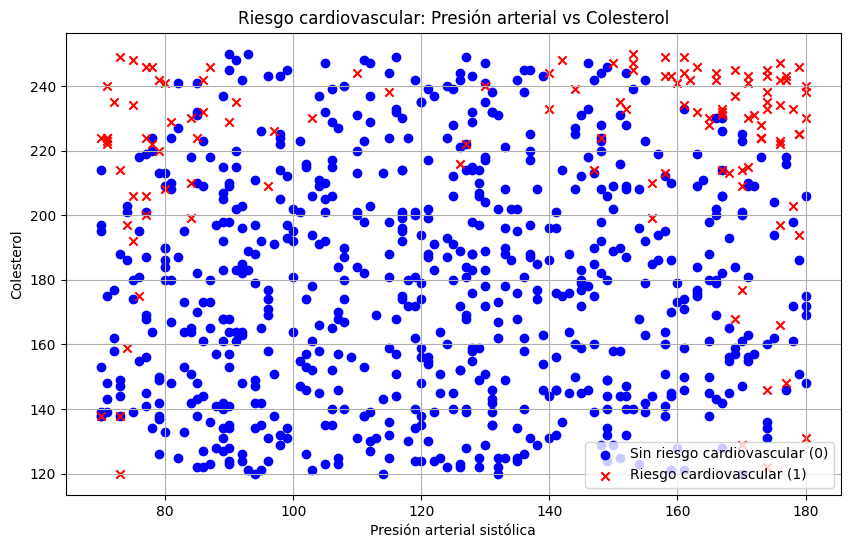

In [6]:

# Variables para facilitar el plot
arterial_pressure = people_data[:, 0]  
colesterol = people_data[:, 1]        
has_illness = people_data[:, -1]    

# Tamaño que queremos que tenga el plot
plt.figure(figsize=(10, 6))

# Graficar puntos sin riesgo cardiovascular (clase 0)
plt.scatter(arterial_pressure[has_illness == 0], colesterol[has_illness == 0], 
            color='blue', marker='o', label='Sin riesgo cardiovascular (0)')

# Graficar puntos con riesgo cardiovascular (clase 1)
plt.scatter(arterial_pressure[has_illness == 1], colesterol[has_illness == 1], 
            color='red', marker='x', label='Riesgo cardiovascular (1)')

# Añadir etiquetas y título
plt.xlabel('Presión arterial sistólica')
plt.ylabel('Colesterol')
plt.title('Riesgo cardiovascular: Presión arterial vs Colesterol')
plt.legend()
plt.grid(True)
plt.show()

# Entrenamiento del modelo:

*DISCLAIMER: Para repetir este apartado correctamente has de ejecutar la celda de generación de datos de nuevo.*

Durante este apartado vamos a crear un nuevo modelo de regresión logistica el cual será entrenado haciendo uso 
de las variables generadas por el script de generación del dataset, comparandolas con el que debería de ser su resultado.

Una vez entrenado el modelo vamos a mirar su precisión y hacer un plot de los resultados que estima el modelo que serían 
los correctos. Finalmente compararemos los resultados reales y esperados y trataremos las diferencias que hay entre ambos. 

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

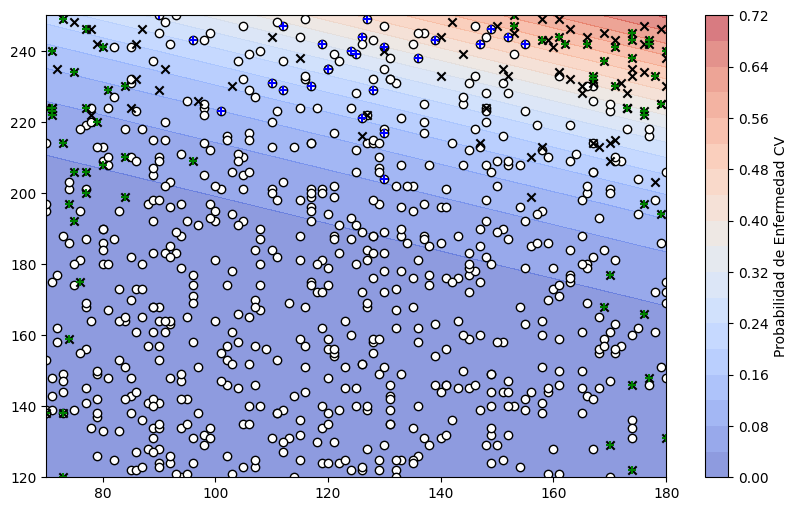

In [ ]:

# Para entrenar tenemos que por una parte pasar los datos todos los datos, y por la otra el resultado binario
# Tomamos todas las columnas salvo las dos últimas [p_arterial, colesterol y fc]
train_data = people_data[:, :-2] 

# Tomamos la columna última columna, la cual almacena si tiene la enfermedad
train_results = people_data[:, -1] 

# Generamos 100 puntos para los otros valores segun sus limites
arterial_array = np.linspace(MIN_ARTERIAL, MAX_ARTERIAL, 100)
colesterol_array = np.linspace(MIN_COLESTEROL, MAX_COLESTEROL, 100)
fc_array = np.linspace(MIN_FC, MAX_FC, 100)

# Variables para facilitar el plot
arterial_pressure = people_data[:, 0]  
colesterol = people_data[:, 1]        
has_illness = people_data[:, -1]  

log_reg = lm.LogisticRegression()

log_reg.fit(train_data, train_results)

# Predicciones
probabilities = log_reg.predict(train_data)
accuracy = accuracy_score(train_results, probabilities) * 100

# Crear malla para visualizar la frontera de decisión
arterial_array = np.linspace(MIN_ARTERIAL, MAX_ARTERIAL, 50)
colesterol_array = np.linspace(MIN_COLESTEROL, MAX_COLESTEROL, 50)
xx, yy = np.meshgrid(arterial_array, colesterol_array)

# Predecir valores en la malla con el modelo
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, 80)])[:, 1] 
Z = Z.reshape(xx.shape)

# Gráfica
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Probabilidad de Enfermedad CV")

# Graficar puntos originales
plt.scatter(arterial_pressure[train_results == 0], colesterol[train_results == 0], 
            color='white', edgecolor='black', marker='o', label='Sin riesgo (0)')
plt.scatter(arterial_pressure[train_results == 1], colesterol[train_results == 1], 
            color='black', marker='x', label='Con riesgo (1)')

# Identificar y graficar errores de predicción
false_negatives = (probabilities == 0) & (train_results == 1)
false_positives = (probabilities == 1) & (train_results == 0)

plt.scatter(arterial_pressure[false_negatives], colesterol[false_negatives], color='green', marker='+', label='Falso Negativo')
plt.scatter(arterial_pressure[false_positives], colesterol[false_positives], color='blue', marker='+', label='Falso Positivo')

# Etiquetas
plt.xlabel("Presión Arterial")
plt.ylabel("Colesterol")
plt.legend()
plt.title(f"Frontera de decisión - Precisión: {accuracy:.2f}%")
plt.show()

# Resultados
print(f"Precisión del modelo: {accuracy:.2f}%")
print(f"Errores: {sum(false_negatives) + sum(false_positives)} de {len(train_results)}")

Como podemos ver, los resultados predichos obtienen una tasa de acierto que se mueve entre el 89% y el 92%. Vemos que la 
predicción tiende a evitar los casos más extremos (como aquellos del colesterol por debajo de 90 o por encima de 160).

La concentración de errores por tipos es muy marcada, situandose en el centro superior los falsos Positivos y en los laterales inferiores los falsos negativos. 

# Repetición de las pruebas:
Finalmente, vamos a repetir todo lo visto hasta ahora pero con 500 personas en lugar de 800 y nos fijaremos en como varían 
los resultados.  

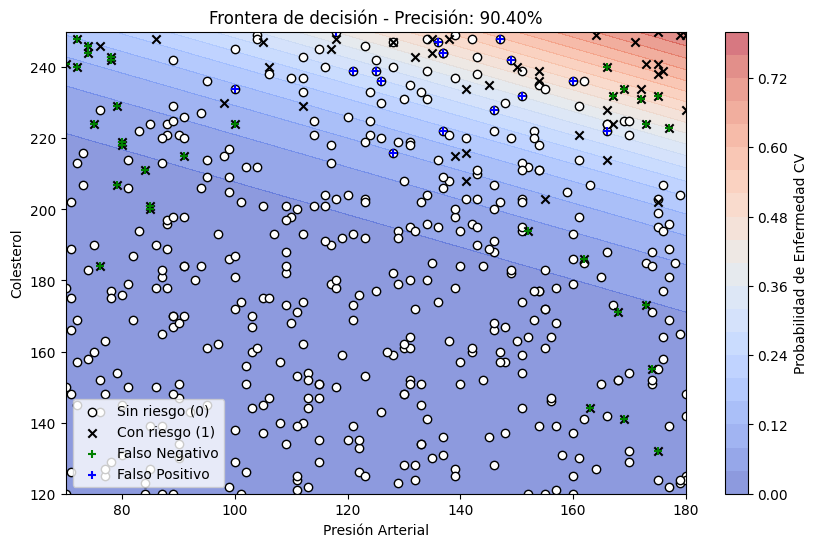

Precisión del modelo: 90.40%
Errores: 48 de 500


In [34]:
# Generamos una sample de 500 personas aleatoria
people_data = generate_people(500)

# Calculamos sus probabilidades
people_data = compute_probability_illness(people_data)

# Ahora ya podemos aplicar la cota sobre los datos
people_data = apply_threshold(0.5, people_data)

train_data = people_data[:, :-2] 

# Tomamos la columna última columna, la cual almacena si tiene la enfermedad
train_results = people_data[:, -1] 

# Generamos 100 puntos para los otros valores segun sus limites
arterial_array = np.linspace(MIN_ARTERIAL, MAX_ARTERIAL, 100)
colesterol_array = np.linspace(MIN_COLESTEROL, MAX_COLESTEROL, 100)
fc_array = np.linspace(MIN_FC, MAX_FC, 100)

# Variables para facilitar el plot
arterial_pressure = people_data[:, 0]  
colesterol = people_data[:, 1]        
has_illness = people_data[:, -1]  


# Predicciones
probabilities = log_reg.predict(train_data)
accuracy = accuracy_score(train_results, probabilities) * 100

# Crear malla para visualizar la frontera de decisión
arterial_array = np.linspace(MIN_ARTERIAL, MAX_ARTERIAL, 50)
colesterol_array = np.linspace(MIN_COLESTEROL, MAX_COLESTEROL, 50)
xx, yy = np.meshgrid(arterial_array, colesterol_array)

# Predecir valores en la malla con el modelo
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, 80)])[:, 1] 
Z = Z.reshape(xx.shape)

# Gráfica
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Probabilidad de Enfermedad CV")

# Graficar puntos originales
plt.scatter(arterial_pressure[train_results == 0], colesterol[train_results == 0], 
            color='white', edgecolor='black', marker='o', label='Sin riesgo (0)')
plt.scatter(arterial_pressure[train_results == 1], colesterol[train_results == 1], 
            color='black', marker='x', label='Con riesgo (1)')

# Identificar y graficar errores de predicción
false_negatives = (probabilities == 0) & (train_results == 1)
false_positives = (probabilities == 1) & (train_results == 0)

plt.scatter(arterial_pressure[false_negatives], colesterol[false_negatives], color='green', marker='+', label='Falso Negativo')
plt.scatter(arterial_pressure[false_positives], colesterol[false_positives], color='blue', marker='+', label='Falso Positivo')

# Etiquetas
plt.xlabel("Presión Arterial")
plt.ylabel("Colesterol")
plt.legend()
plt.title(f"Frontera de decisión - Precisión: {accuracy:.2f}%")
plt.show()

# Resultados
print(f"Precisión del modelo: {accuracy:.2f}%")
print(f"Errores: {sum(false_negatives) + sum(false_positives)} de {len(train_results)}")

Finalmente podemos observar que la precisión, como era de esperar, baja. Esta vez estamos hablando de una precisión 
en que se mueve entre el 89% y el 92%. Esto no es de extrañar ya que estamos usando el mismo modelo.

Otra de las cosas que podemos observar es que los fallos se mantienen en las mismas zonas: En el centro superior los falsos positivos y en los laterales inferiores los falsos negativos. 

Como conclusión propongo lo siguiente: y es que a diferencia del modelo de regresión lineal que si que era un fiel 
representate de la estructura de los datos, este considero que podría hacer una mejor labor. Si es verdad que recoge 
las zonas generales, pero se le dificultan casos extremos. Esto me lleva a pensar una de las siguientes dos cosas:
- La tercera variable tiene un peso demasiado grande en comparación con el usado por la profesora en clase.
- Aunque este modelo funciona, existen modelos mejores para una predicción de este tipo, al menos para casos extremos. 

Y aunque la proyección de los datos inicial me sale similar a la vista en clase, no descarto la primera posibilidad. 

## Notas de la práctica: 

Finalmente, me gustaría añadir la admisión de error en las gráficas. En lo personal he realizado mi mejor esfuerzo para ver tratar de dibujar el límite de decisión del algoritmo, pero no he sido capaz. No conocía herramientas ni plots que lo facilitaran y en la documentación de la regresión lineal no encontré información relevante con respecto a este tema, a diferencia de para la regresión lineal.

En cuanto al último apartado, entendí que trabajasemos con el mismo modelo de regresión logística, ya que si bien al entrenarlo de 0 y evaluarlo sobre los datos obteníamos una precisión ligeramente menor, no me parecía que fuese una buena representación del uso de estos modelos. Todo esto lo se al haber estado experimentando con ello fuera del ámbito de la práctica.